data/ec_vs_NOec_pide100_c50.h5
LOAD - This may take a while, if you run this the first time!
212952

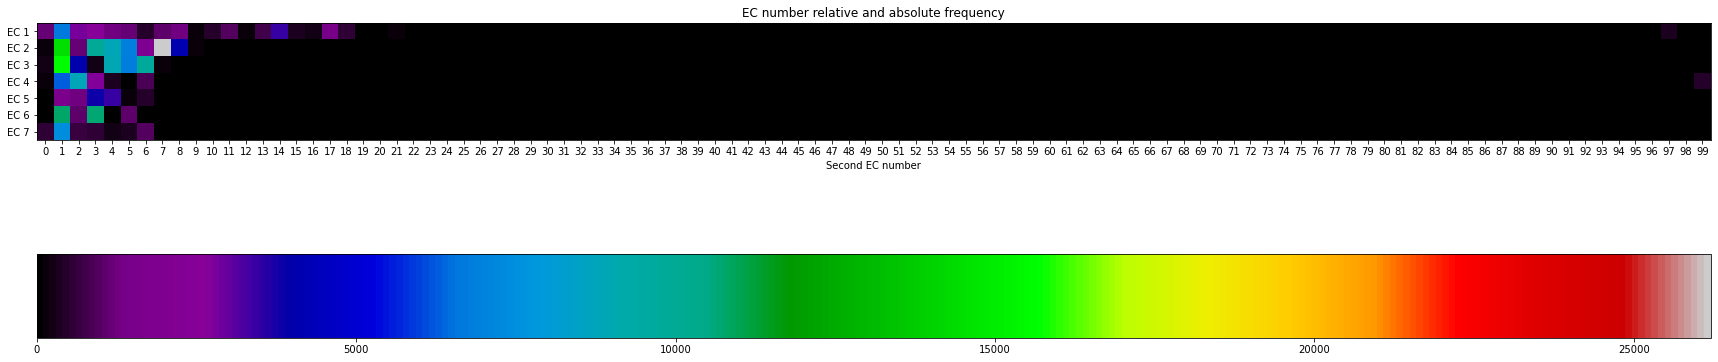

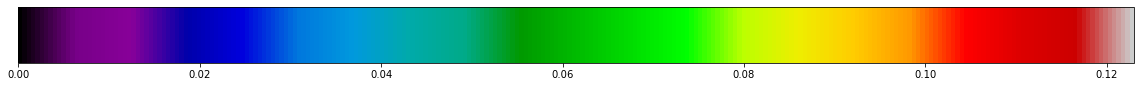

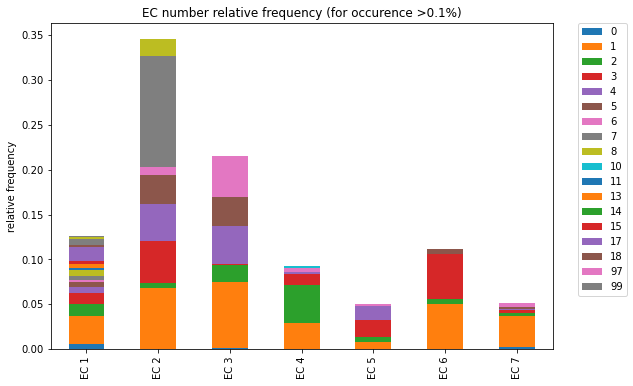

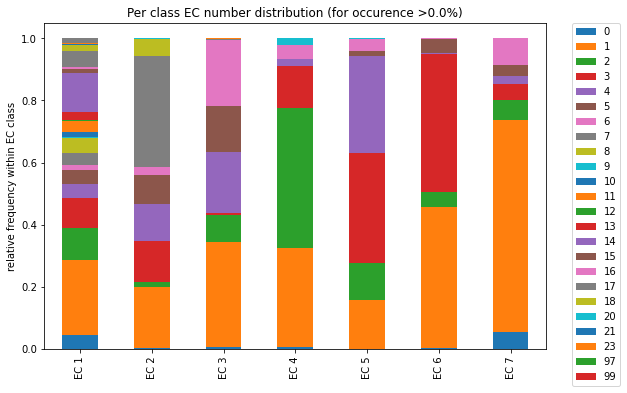

In [181]:
from Bio.SeqIO import PirIO
import Bio.SeqIO as SeqIO
import h5py
from time import time
import numpy as np
import sys
import pandas as pd


from matplotlib.ticker import NullFormatter
from sklearn.manifold import TSNE
import seaborn as sns

if __name__ == "__main__":
    h5py_file = 'data/ec_vs_NOec_pide100_c50.h5'
    fasta_path = 'data/nonRed_dataset/ec_vs_NOec_pide20_c50_train.fasta'
    anno = 'data/annotations/merged_anno.txt'

    print(h5py_file)
    proteins = []
    print('LOAD - This may take a while, if you run this the first time!')
    # https://stackoverflow.com/questions/20928136/input-and-output-numpy-arrays-to-h5py
    count = 0

    # First I want to see the splitt only in the 6 main-classes, befor we do something fancy here.
    def reduceAnno(anno: str):
        i = int(anno[0])
        return i

    
    # 2D array 
    arr = np.zeros((7,100))
    
    
    identifiers = []
    embeding = []
    color = []
    with open(anno) as fp:
        with h5py.File(h5py_file, 'r') as h5:
            i = 0
            for line in fp:
                input = line.strip().split('\t')
                if input[0] in h5:
                    identifiers.append(input[0])
                    # print(h5[input[0]])
                    embeding.append(h5[input[0]][:])
                    color.append(reduceAnno(input[1]))
                    
                    # concert to string for 'split'-method later 
                    # schould probably be moved to the reduceAnno function
                    a = str(input[1])
                    EC1 = int(a[0])-1
                    if a.split('.')[1].split('.')[0] == '-':
                        EC2 = 0
                    else:
                        EC2 = int(a.split('.')[1].split('.')[0])
                    arr[EC1,EC2] += 1
                    
                    
                    i += 1
                
                if i == -1000:
                    break
                    
                else:
                    pass
                    # print(input[0], 'NOT FOUND')

                sys.stdout.write('\r' + str(i))



fig= plt.figure(figsize=(30,14))


labelsy = ['EC 1', 'EC 2', 'EC 3', 'EC 4', 'EC 5', 'EC 6', 'EC 7' ]



plt.imshow(arr, cmap='nipy_spectral', interpolation='nearest')
ax = plt.gca()

ax.set_xlabel('Second EC number')
ax.set_title('EC number relative and absolute frequency')
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_xticks(np.linspace(0, 99, num=100))
ax.set_yticklabels(labelsy)
plt.colorbar(orientation="horizontal")

plt.show()

fig= plt.figure(figsize=(20,14))

plt.imshow(arr/np.sum(arr), cmap='nipy_spectral', interpolation='nearest')
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")

plt.show()



thresh = 0.001
arr1 = arr/np.sum(arr)
arr1 = (arr1 > thresh) * arr1

pd.DataFrame(arr1).plot(kind='bar',stacked=True,figsize=(9, 6),label=np.unique(np.argwhere(arr1 > 0.00)[:,1]))
plt.legend(np.unique(np.argwhere(arr1 > 0.00)[:,1]),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax = plt.gca()

ax.set_ylabel('relative frequency')
ax.set_title('EC number relative frequency (for occurence >' + str(thresh*100) +'%)')
ax.set_xticklabels(labelsy)
plt.show()





thresh = 0.0
arr2 = (arr > thresh) * arr

for i in range(0,7):
    arr2[i] = arr2[i]/np.sum(arr2[i])


pd.DataFrame(arr2).plot(kind='bar',stacked=True,figsize=(9, 6),label=np.unique(np.argwhere(arr2 > 0.00)[:,1]))
plt.legend(np.unique(np.argwhere(arr2 > 0.00)[:,1]),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax = plt.gca()

ax.set_ylabel('relative frequency within EC class')
ax.set_title('Per class EC number distribution (for occurence >' + str(thresh*100) +'%)')
ax.set_xticklabels(labelsy)
plt.show()
